In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Put samples in `/data` directory

## Training data and evaluation data

In [2]:
# dataframes
data = pd.read_csv('data/train_data/train_task_3_4.csv')
eval_vali = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')

# submission template
template = pd.read_csv('submission/template.csv')

In [3]:
display(data.head())
display(eval_vali.head())
display(eval_test.head())

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [4]:
data.nunique()

QuestionId           948
UserId              4918
AnswerId         1382727
IsCorrect              2
CorrectAnswer          4
AnswerValue            4
dtype: int64

In [5]:
# evaluation function (code from https://competitions.codalab.org/forums/22145/4564/)
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    return submission_preference

## Metadata

In [6]:
student_metadata = pd.read_csv('data/metadata/student_metadata_task_3_4.csv')
subject_metadata = pd.read_csv('data/metadata/subject_metadata.csv')
answer_metadata = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')
question_metadata = pd.read_csv('data/metadata/question_metadata_task_3_4.csv')

print("Student Metadata")
display(student_metadata.head())
print("Question Metadata")
display(question_metadata.head())
print("Subject Metadata")
display(subject_metadata.head())
print("Answer Metadata")
display(answer_metadata.head())

Student Metadata


,UserId,Gender,DateOfBirth,PremiumPupil
0,3837,2,2007-10-01 00:00:00.000,0.0
1,207,0,NaN,NaN
2,3581,2,2008-03-01 00:00:00.000,0.0
3,6028,2,2008-01-01 00:00:00.000,0.0
4,1451,0,NaN,NaN


Question Metadata


,QuestionId,SubjectId
0,684,"[3, 71, 98, 209]"
1,87,"[3, 71, 98, 209]"
2,679,"[3, 71, 98, 209]"
3,685,"[3, 71, 98, 209]"
4,222,"[3, 71, 98, 209]"


Subject Metadata


,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2


Answer Metadata


,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,1451945,2019-10-30 14:34:00.000,NaN,4,32,52562.0
1,45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0
2,687013,2020-01-18 10:52:00.000,NaN,235,64,52562.0
3,91254,2020-02-29 17:25:00.000,NaN,194,97,52562.0
4,1225855,2020-03-06 15:07:00.000,NaN,95,115,52562.0


In [7]:
len(question_metadata)

948

## Examinations

### 00 - inspect problems which every human evaluator agreed to be superior then the other

In [8]:
import matplotlib.image as img
def show_problems(probId1, probId2):
    img1 = img.imread('data/images/{}.jpg'.format(probId1))
    img2 = img.imread('data/images/{}.jpg'.format(probId2))
    
    plt.figure(figsize = (16,32))
    
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title('Q.{}'.format(probId1))
    
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title('Q.{}'.format(probId2))
    plt.show()    

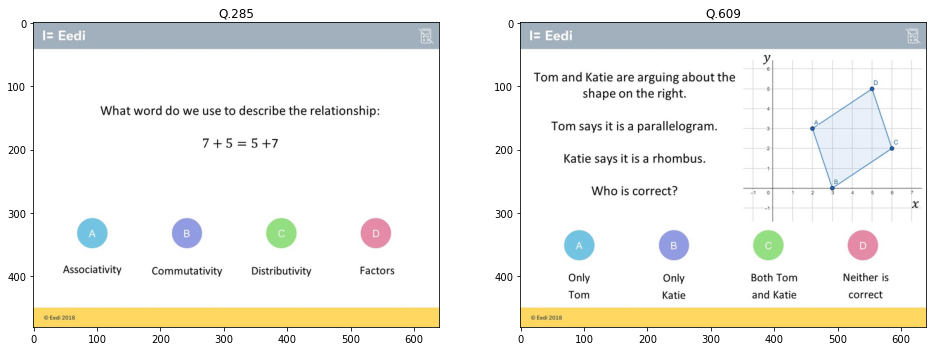

In [9]:
show_problems('285', '609')

In [10]:
eval_vali_perfect = pd.DataFrame(columns=eval_vali.columns) # 모든 human evaluator가 동의한 항목 모음
for _, row in eval_vali.iterrows():
    if (row.loc['T1_ALR':'T5_NS'].mean()== 2) or (row.loc['T1_ALR':'T5_NS'].mean()== 1):
        eval_vali_perfect = eval_vali_perfect.append(row , ignore_index=True)
eval_vali_perfect

,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,16.0,16.0,285.0,609.0,2.0,2.0,2.0,2.0,2.0
1,41.0,41.0,877.0,620.0,2.0,2.0,2.0,2.0,2.0
2,35.0,35.0,668.0,741.0,1.0,1.0,1.0,1.0,1.0
3,2.0,2.0,555.0,815.0,1.0,1.0,1.0,1.0,1.0
4,20.0,20.0,225.0,558.0,2.0,2.0,2.0,2.0,2.0
5,29.0,29.0,118.0,116.0,1.0,1.0,1.0,1.0,1.0
6,24.0,24.0,527.0,129.0,2.0,2.0,2.0,2.0,2.0
7,22.0,22.0,547.0,578.0,1.0,1.0,1.0,1.0,1.0


In [11]:
# human evaluator들의 의견이 모두 일치하는 문제 세트를 모두 출력(용량 많음)
# for row in eval_vali_perfect.itertuples():
#     print(row.T1_ALR)
#     show_problems(int(row.left), int(row.right))

### 01 - group problems by subject(lv.1)

In [12]:
tuple(map(int, question_metadata['SubjectId'][0][1:-2].split(', ')))

(3, 71, 98, 20)

In [13]:
question_metadata['SubjectId'][0][1:-2].split(', ')[1]

'71'

In [14]:
qmd = question_metadata.copy()

In [15]:
qmd['subId'] = qmd.SubjectId.apply(lambda x: x[1:-2].split(', ')[1])
qmd.head()

,QuestionId,SubjectId,subId
0,684,"[3, 71, 98, 209]",71
1,87,"[3, 71, 98, 209]",71
2,679,"[3, 71, 98, 209]",71
3,685,"[3, 71, 98, 209]",71
4,222,"[3, 71, 98, 209]",71


### 02 - Get Correct Answer numbers

In [16]:
dataa = data.copy()
dataa.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [17]:
dataa.drop(columns=['UserId', 'AnswerId','IsCorrect', 'AnswerValue'], inplace=True)
dataa.head()

,QuestionId,CorrectAnswer
0,898,2
1,767,3
2,165,2
3,490,4
4,298,3


In [18]:
dataa.drop_duplicates(['QuestionId'], inplace=True, ignore_index=True)
dataa.head()

,QuestionId,CorrectAnswer
0,898,2
1,767,3
2,165,2
3,490,4
4,298,3


In [19]:
len(dataa)

948

### 03 - Get Ratio

In [20]:
dataaa = data.copy()
dataaa.drop(columns=['UserId', 'AnswerId', 'CorrectAnswer', 'AnswerValue'], inplace=True)
ratioo = dataaa.groupby('QuestionId').mean()
ratioo.head()

,IsCorrect
QuestionId,
0,0.443457
1,0.571429
2,0.385214
3,0.808757
4,0.401408


In [21]:
ratioo.rename(columns={'IsCorrect':'CRRatio'})

,CRRatio
QuestionId,
0,0.443457
1,0.571429
2,0.385214
3,0.808757
4,0.401408
...,...
943,0.566528
944,0.142857
945,0.422336


## Create df - mydata

In [22]:
mydata = pd.read_csv('submission/template.csv')
mydata.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [23]:
# subId
QMD = question_metadata.copy()
QMD['SubId'] = QMD.SubjectId.apply(lambda x: x[1:-2].split(', ')[1])
QMD.drop(columns=['SubjectId'], inplace=True)
display(QMD.head())

mydata = pd.merge(left = mydata, right = QMD, how = 'inner', on = 'QuestionId')
display(mydata.head())

,QuestionId,SubId
0,684,71
1,87,71
2,679,71
3,685,71
4,222,71


,QuestionId,ranking,SubId
0,0,NaN,32
1,1,NaN,32
2,2,NaN,32
3,3,NaN,32
4,4,NaN,71


In [24]:
# CorrectAnswer
DT = data.copy()
DT.drop(columns=['UserId', 'AnswerId','IsCorrect', 'AnswerValue'], inplace=True)
DT.drop_duplicates(['QuestionId'], inplace=True, ignore_index=True)
display(DT.head())

mydata = pd.merge(mydata, DT, 'inner', 'QuestionId')
display(mydata)

,QuestionId,CorrectAnswer
0,898,2
1,767,3
2,165,2
3,490,4
4,298,3


,QuestionId,ranking,SubId,CorrectAnswer
0,0,NaN,32,1
1,1,NaN,32,3
2,2,NaN,32,2
3,3,NaN,32,2
4,4,NaN,71,3
...,...,...,...,...
943,943,NaN,32,4
944,944,NaN,32,4
945,945,NaN,32,1
946,946,NaN,32,2


In [25]:
# CorrectResponseRatio
DT2 = data.copy()
DT2.drop(columns=['UserId', 'AnswerId', 'CorrectAnswer', 'AnswerValue'], inplace=True)
CRR = DT2.groupby('QuestionId').mean().rename(columns={'IsCorrect':'CRRatio'})
display(CRR.head())

mydata = pd.merge(mydata, CRR, 'inner', 'QuestionId')
display(mydata)

,CRRatio
QuestionId,
0,0.443457
1,0.571429
2,0.385214
3,0.808757
4,0.401408


,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,NaN,32,1,0.443457
1,1,NaN,32,3,0.571429
2,2,NaN,32,2,0.385214
3,3,NaN,32,2,0.808757
4,4,NaN,71,3,0.401408
...,...,...,...,...,...
943,943,NaN,32,4,0.566528
944,944,NaN,32,4,0.142857
945,945,NaN,32,1,0.422336
946,946,NaN,32,2,0.459459


In [26]:
mydata.nunique()

QuestionId       948
ranking            0
SubId              3
CorrectAnswer      4
CRRatio          887
dtype: int64

In [27]:
mydata.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,NaN,32,1,0.443457
1,1,NaN,32,3,0.571429
2,2,NaN,32,2,0.385214
3,3,NaN,32,2,0.808757
4,4,NaN,71,3,0.401408


## Other preprocesses

In [28]:
qids_of_vali = eval_vali.left.tolist() + eval_vali.right.tolist()
qids_of_vali.sort()
qids_of_vali

[4,
 16,
 27,
 56,
 116,
 118,
 121,
 127,
 129,
 132,
 139,
 153,
 158,
 202,
 225,
 233,
 246,
 271,
 285,
 316,
 318,
 327,
 363,
 403,
 404,
 478,
 527,
 527,
 547,
 555,
 558,
 578,
 586,
 609,
 620,
 668,
 676,
 691,
 704,
 721,
 733,
 741,
 761,
 780,
 815,
 830,
 865,
 876,
 877,
 909]

In [29]:
np.random.seed(20182453)
mydata.ranking = np.random.rand(len(mydata))
mydata

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,0.354022,32,1,0.443457
1,1,0.669470,32,3,0.571429
2,2,0.889675,32,2,0.385214
3,3,0.776041,32,2,0.808757
4,4,0.046299,71,3,0.401408
...,...,...,...,...,...
943,943,0.711183,32,4,0.566528
944,944,0.574058,32,4,0.142857
945,945,0.761579,32,1,0.422336
946,946,0.872746,32,2,0.459459


In [30]:
eVali = eval_vali.copy()
eTest = eval_test.copy()
eVali['Final'] = eVali.filter(regex='^T', axis = 1).mean(axis=1).apply(lambda x: 2 if x > 1.5 else 1)
eTest['Final'] = eTest.filter(regex='^T', axis = 1).mean(axis=1).apply(lambda x: 2 if x > 1.5 else 1)

display(eVali.head(), eTest.head())

,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,Final
0,0,0,909,318,2,2,2,1.0,2,2
1,16,16,285,609,2,2,2,2.0,2,2
2,48,48,132,271,1,2,2,2.0,1,2
3,38,38,704,127,2,2,1,2.0,2,2
4,33,33,16,586,1,1,2,2.0,2,2


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,Final
0,15,15,145,762,2,2,2,2.0,2,2
1,31,31,307,208,1,1,1,2.0,1,1
2,25,25,278,195,1,1,1,1.0,1,1
3,3,3,13,153,2,2,2,2.0,2,2
4,40,40,23,100,2,1,1,1.0,1,1


In [31]:
# swap ranking values to suit validation data
for row in eVali.itertuples():
    if row.Final == 1:
        if mydata[mydata.QuestionId == row.left].ranking.values[0] < mydata[mydata.QuestionId == row.right].ranking.values[0]:
            tmp = mydata[mydata.QuestionId == row.left].ranking.values[0]
            mydata[mydata.QuestionId == row.left].ranking.values[0]= mydata[mydata.QuestionId == row.right].ranking.values[0]
            mydata[mydata.QuestionId == row.right].ranking.values[0]= tmp
    elif row.Final == 2:
        if mydata[mydata.QuestionId == row.left].ranking.values[0]> mydata[mydata.QuestionId == row.right].ranking.values[0]:
            tmp = mydata[mydata.QuestionId == row.left].ranking.values[0]
            mydata[mydata.QuestionId == row.left].ranking.values[0]= mydata[mydata.QuestionId == row.right].ranking.values[0]
            mydata[mydata.QuestionId == row.right].ranking.values[0]= tmp

mydata.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,0.354022,32,1,0.443457
1,1,0.669470,32,3,0.571429
2,2,0.889675,32,2,0.385214
3,3,0.776041,32,2,0.808757
4,4,0.046299,71,3,0.401408


In [32]:
~mydata.QuestionId.isin(qids_of_vali)

0       True
1       True
2       True
3       True
4      False
       ...  
943     True
944     True
945     True
946     True
947     True
Name: QuestionId, Length: 948, dtype: bool

In [33]:
mydata[mydata.QuestionId.isin(qids_of_vali)].head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
4,4,0.046299,71,3,0.401408
16,16,0.346669,32,1,0.583478
27,27,0.952344,32,1,0.451696
56,56,0.294338,71,3,0.516450
116,116,0.306408,71,2,0.532516


## Fitting

In [34]:
mydata_in_vali = mydata[mydata.QuestionId.isin(qids_of_vali)].copy()
mydata_in_vali.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
4,4,0.046299,71,3,0.401408
16,16,0.346669,32,1,0.583478
27,27,0.952344,32,1,0.451696
56,56,0.294338,71,3,0.516450
116,116,0.306408,71,2,0.532516


In [35]:
mydata_not_vali = mydata[~mydata.QuestionId.isin(qids_of_vali)].copy()
mydata_not_vali.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,0.354022,32,1,0.443457
1,1,0.669470,32,3,0.571429
2,2,0.889675,32,2,0.385214
3,3,0.776041,32,2,0.808757
5,5,0.628230,71,4,0.190876


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
y = mydata_in_vali[['ranking']]
X = mydata_in_vali[['SubId', 'CorrectAnswer', 'CRRatio']]
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.70814095]), array([[-0.002403  ,  0.02228532, -0.43510357]]))

In [38]:
X2 = mydata_not_vali[['SubId', 'CorrectAnswer', 'CRRatio']]
display(mydata_not_vali[['ranking']].head())
mydata_not_vali['ranking'] = lin_reg.predict(X2)
display(mydata_not_vali[['ranking']].head())

,ranking
0,0.354022
1,0.669470
2,0.889675
3,0.776041
5,0.628230


,ranking
0,0.460581
1,0.449470
2,0.508208
3,0.323922
5,0.543618


In [39]:
mydata.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0,0.354022,32,1,0.443457
1,1,0.669470,32,3,0.571429
2,2,0.889675,32,2,0.385214
3,3,0.776041,32,2,0.808757
4,4,0.046299,71,3,0.401408


In [40]:
mydata.update(mydata_not_vali)

In [41]:
mydata.head()

,QuestionId,ranking,SubId,CorrectAnswer,CRRatio
0,0.0,0.460581,32,1.0,0.443457
1,1.0,0.449470,32,3.0,0.571429
2,2.0,0.508208,32,2.0,0.385214
3,3.0,0.323922,32,2.0,0.808757
4,4.0,0.046299,71,3.0,0.401408


In [42]:
len(mydata)

948

In [43]:
mydata[['QuestionId', 'ranking']].to_csv('submission/Result01.csv', index=False)

## Results

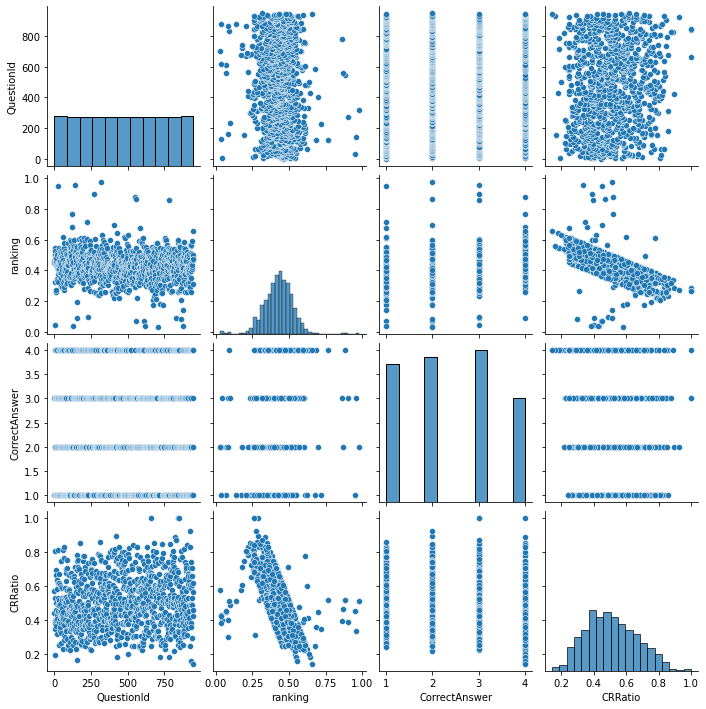

In [44]:
sns.pairplot(mydata)

<AxesSubplot:xlabel='CRRatio', ylabel='ranking'>

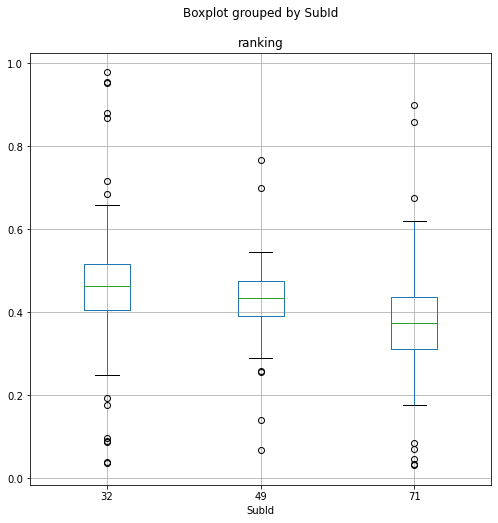

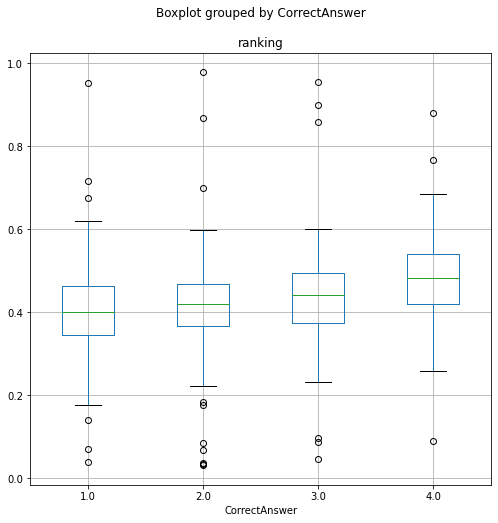

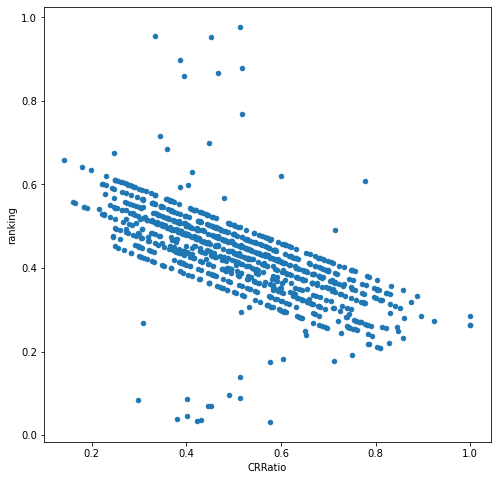

In [45]:
mydata.boxplot(by='SubId', column='ranking', figsize=(8, 8))
mydata.boxplot(column='ranking', by='CorrectAnswer', figsize=(8, 8))
mydata.plot.scatter(x='CRRatio', y='ranking', figsize=(8, 8))

In [46]:
subject_metadata[subject_metadata.SubjectId.isin([32, 49, 71])].Name

1                   Number
17                 Algebra
39    Geometry and Measure
Name: Name, dtype: object

In [47]:
estimateV = evaluate(eval_test, mydata)

[1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1]


In [48]:
trueV = eTest['Final'].tolist()

In [49]:
print(trueV)
print(estimateV)

[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1]


In [50]:
ev = np.array(estimateV)
tv = np.array(trueV)

samev = (ev == tv)
samev.sum() / samev.size

0.4

In [ ]:
# for row in eVali.itertuples():
#     print(row.Final)
#     show_problems(int(row.left), int(row.right))